In [7]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from lib import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

## Load

In [13]:
data = load('250321-exp7')
noise = data.pop(-1)
for step in data:
    step.chi_im /= noise.chi_im
# denoise_dataset(data, noise)

## Do fits

[I, omega, alpha] =  [1.10263796e-05 4.84186684e+01 1.83082390e-04]


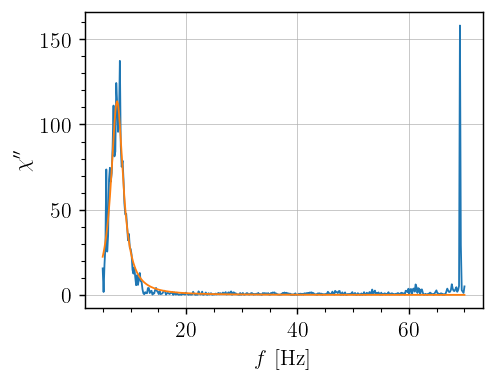

[I, omega, alpha] =  [1.09140968e-05 4.92970951e+01 1.82001640e-04]


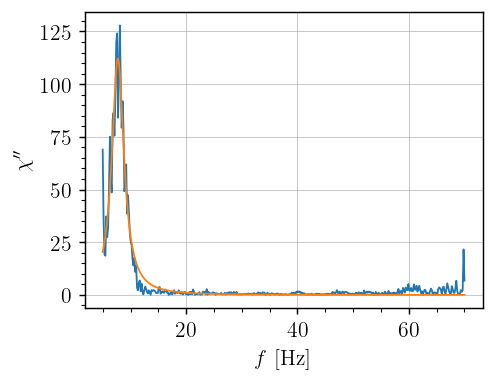

[I, omega, alpha] =  [1.16007409e-05 4.85640148e+01 2.09464865e-04]


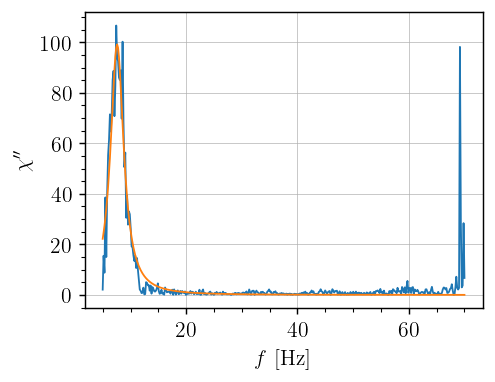

[I, omega, alpha] =  [1.19091107e-05 4.90894449e+01 1.87816237e-04]


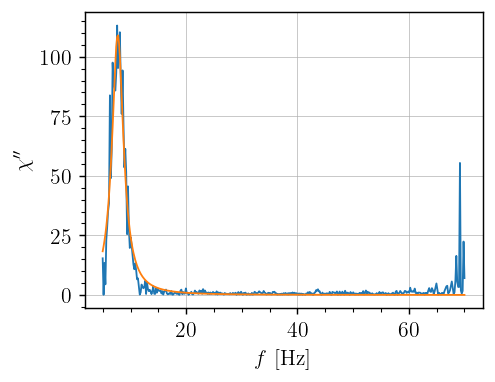

[I, omega, alpha] =  [1.05085773e-05 4.91091942e+01 2.25398993e-04]


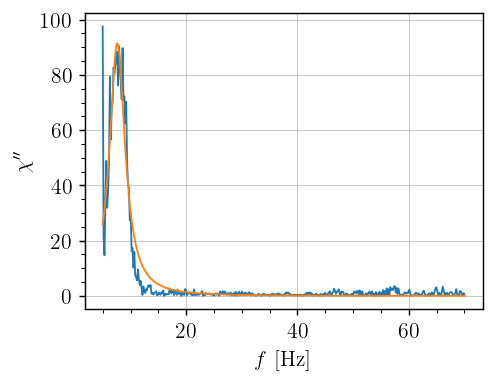

[I, omega, alpha] =  [9.73678441e-06 4.87378748e+01 2.05667702e-04]


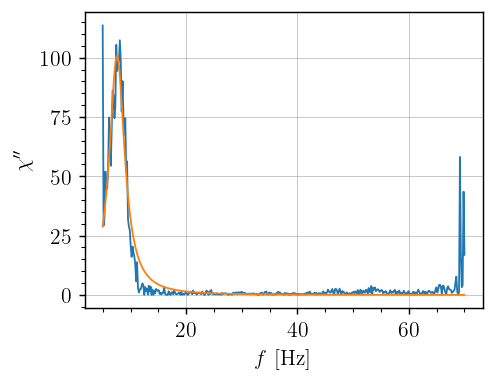

[I, omega, alpha] =  [1.05221404e-05 4.80839307e+01 2.34496650e-04]


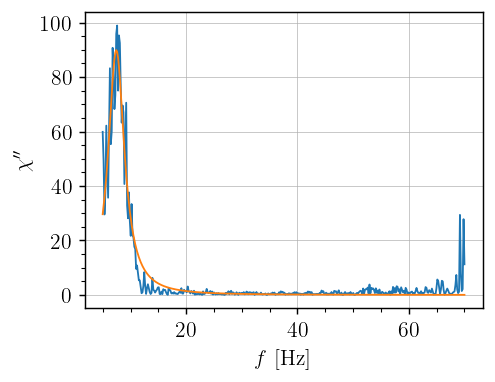

[I, omega, alpha] =  [5.43434178e-06 3.11740731e+01 4.05150320e-04]


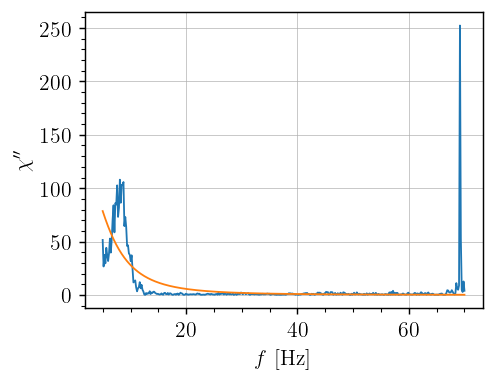

[I, omega, alpha] =  [1.35361396e-05 4.93553213e+01 3.11571504e-04]


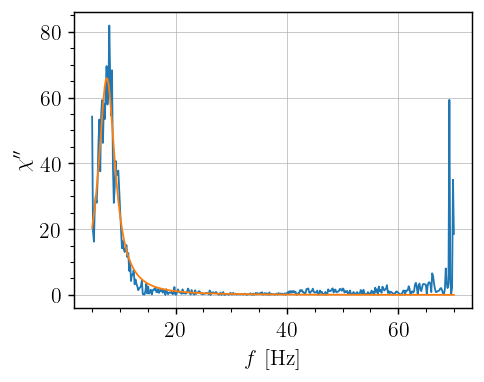

[I, omega, alpha] =  [1.07992015e-05 5.05614733e+01 2.39121779e-04]


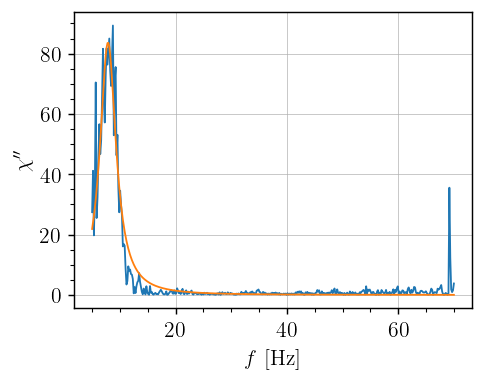

[I, omega, alpha] =  [1.12151651e-05 5.19110169e+01 2.30795516e-04]


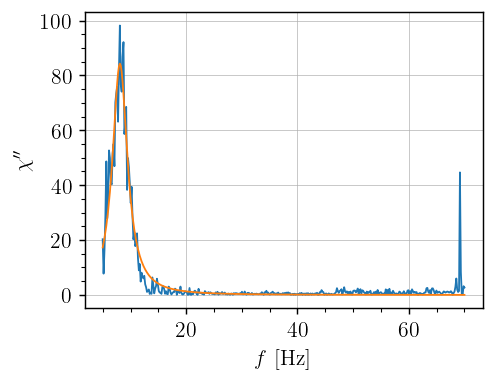

[I, omega, alpha] =  [1.13007207e-05 5.31095476e+01 2.50337222e-04]


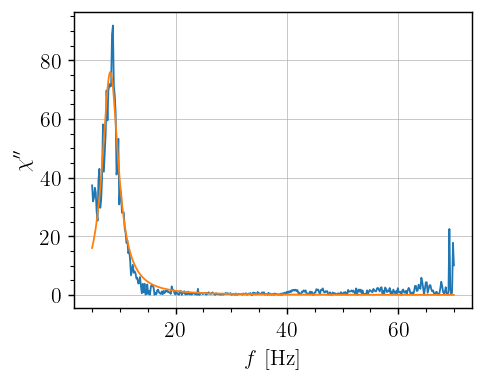

[I, omega, alpha] =  [1.01076681e-05 5.29534985e+01 2.62482927e-04]


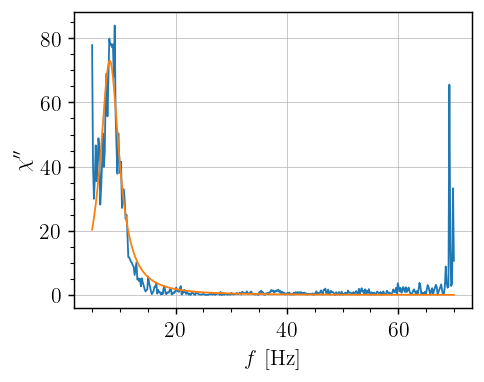

[I, omega, alpha] =  [1.12814211e-05 5.63671331e+01 3.84083328e-04]


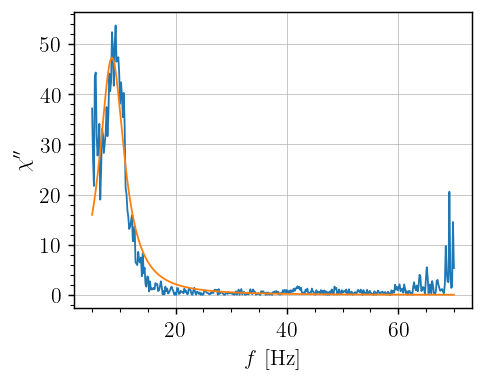

[I, omega, alpha] =  [1.36091790e-05 6.05919606e+01 4.06685739e-04]


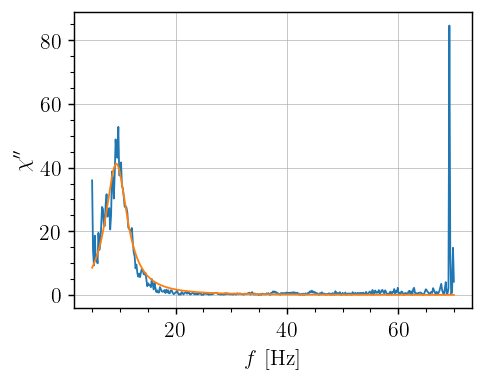

[I, omega, alpha] =  [1.36261422e-05 6.14636639e+01 3.99972880e-04]


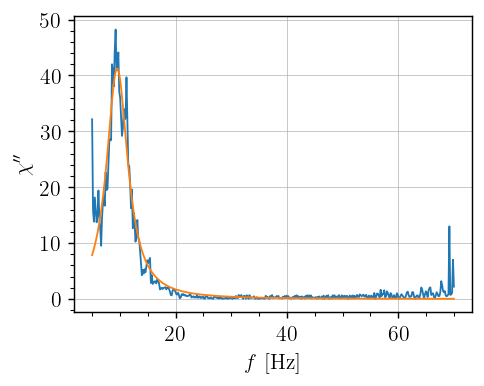

[I, omega, alpha] =  [1.56628601e-05 6.63588425e+01 8.94618319e-04]


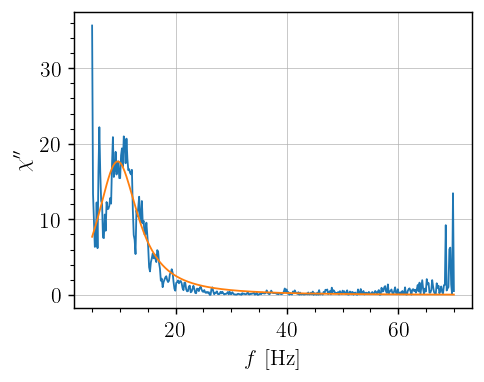

[I, omega, alpha] =  [1.84726266e-05 7.11691537e+01 2.09275069e-03]


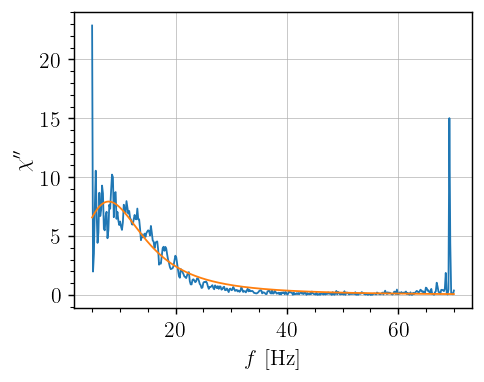

In [ ]:
show_plots = True

all_popt_err_pass1 = unp.uarray(np.zeros((len(data), 3)), 0)
for i, step in enumerate(data):
    popt, pcov = sc.optimize.curve_fit(
        imag_chi, step.freqs, step.chi_im,
        bounds=(0, np.inf),
        # p0=(1e-5, 56, 0.01)
    )
    all_popt_err_pass1[i] = unp.uarray(popt, np.sqrt(np.diag(pcov)))

    # if show_plots:
    #     print("[I, omega, alpha] = ", popt)
    #     plt.plot(step.freqs, step.chi_im)
    #     plt.plot(step.freqs, imag_chi(step.freqs, *popt))
    #     plt.xlabel("$f$ [Hz]")
    #     plt.ylabel("$\\chi''$")
    #     plt.show()

I, w0, _ = np.mean(all_popt_err_pass1, axis=0)
dI, dw0, _ = std_devs(np.mean(all_popt_err_pass1, axis=0))
all_popt_err_pass2 = np.zeros_like(all_popt_err_pass1)
# all_popt_err_pass2 = all_popt_err_pass1

for i, step in enumerate(data):
    popt, pcov = sc.optimize.curve_fit(
        imag_chi, step.freqs, step.chi_im,
        bounds=(
            (I.n - dI, w0.n - dw0, 0),
            (I.n + dI, w0.n + dw0, np.inf)
        ),
        p0=(I.n, w0.n, 0.01)
    )
    all_popt_err_pass2[i] = unp.uarray(popt, np.sqrt(np.diag(pcov)))

    if show_plots:
        print("[I, omega, alpha] = ", popt)
        plt.plot(step.freqs, step.chi_im)
        plt.loglog(step.freqs, imag_chi(step.freqs, *popt))
        plt.xlabel("$f$ [Hz]")
        plt.ylabel("$\\chi''$")
        plt.show()

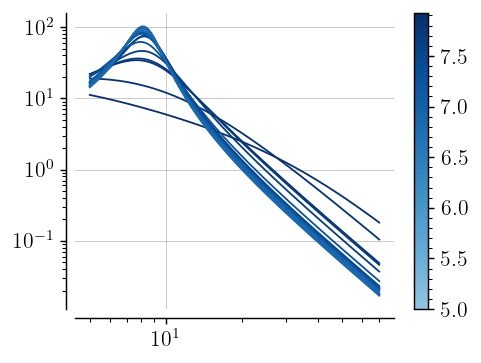

In [22]:
max_amplitude = max(step.imposed_vibration for step in data)
min_amplitude = min(step.imposed_vibration for step in data)

cmap = truncate_colormap(plt.cm.Blues, 0.4, 1.0)
norm = mpl.colors.Normalize(vmin=min_amplitude, vmax=max_amplitude)

fig, ax = plt.subplots()

for i, (popt, step) in enumerate(zip(reversed(nom_vals(all_popt_err_pass2)), reversed(data))):
    color = cmap(step.imposed_vibration / max_amplitude)
    fitted = imag_chi(step.freqs, *popt)
    # ax.loglog(step.freqs, step.chi_abs, c=color)
    ax.loglog(step.freqs, fitted, c=color)

# plt.colorbar()
fig.colorbar(plt.cm.ScalarMappable(norm, cmap), ax=ax)

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_position(('outward', 5))
ax.grid(True, axis='y')
# ax.set_xlim(1e1, 4e1)
# ax.set_ylim(5e-2, 1e1)

## Average $I$, $\omega_0$ and $\alpha$

In [23]:
I, omega0, alpha = np.mean(all_popt_err_pass1, axis=0)
print(f"{I = :.5f} g m²")
print(f"{omega0 = :.5f} Hz")
print(f"{alpha = :.5f} g m² s⁻¹")
I, omega0, alpha = np.mean(all_popt_err_pass2, axis=0)
print(f"{I = :.5f} g m²")
print(f"{omega0 = :.5f} Hz")
print(f"{alpha = :.5f} g m² s⁻¹")

I = 0.00001+/-0.00000 g m²
omega0 = 52.57311+/-0.93023 Hz
alpha = 0.00041+/-0.00001 g m² s⁻¹
I = 0.00001+/-0.00000 g m²
omega0 = 52.30752+/-0.46773 Hz
alpha = 0.00047+/-0.00001 g m² s⁻¹


[  3.75466145 -14.98479891]


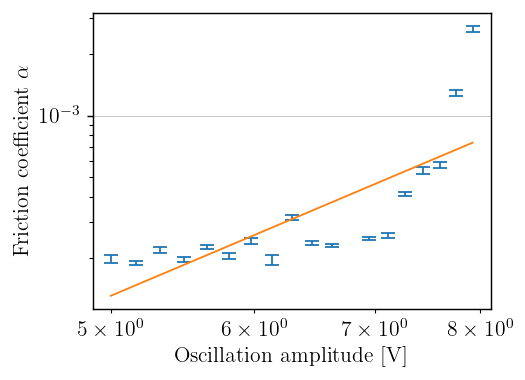

In [24]:
amplitude = np.array([step.imposed_vibration for step in data])
alpha = nom_vals(all_popt_err_pass2)[:, 2]
alpha_err = std_devs(all_popt_err_pass2)[:, 2]

plt.errorbar(amplitude, alpha, yerr=alpha_err, ls='none')

# Weighted fit
coefs, cov = np.polyfit(np.log(amplitude), np.log(alpha), 1, cov=True)  # , w=1/alpha_err)
xx = np.linspace(np.min(amplitude), np.max(amplitude), 50)
yy = np.exp(np.polyval(coefs, np.log(xx)))
plt.plot(xx, yy)
print(coefs)


# slope, offset = do_fit_alpha(data, all_popt_err_pass2[:, 2])

# # plt.text(0.4, 8e-3, fr"$\alpha \sim {offset:.1upL} \Gamma^{{-1}}$")
# print(slope)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'Oscillation amplitude [V]')
plt.ylabel(r'Friction coefficient $\alpha$')

plt.show()